<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pick-a-sample-vessel" data-toc-modified-id="Pick-a-sample-vessel-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pick a sample vessel</a></span></li><li><span><a href="#Sort-based-on-ts" data-toc-modified-id="Sort-based-on-ts-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sort based on ts</a></span></li><li><span><a href="#Drop-rows-with-duplicate" data-toc-modified-id="Drop-rows-with-duplicate-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Drop rows with duplicate</a></span></li><li><span><a href="#Drop-outliers-based-on-ts" data-toc-modified-id="Drop-outliers-based-on-ts-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Drop outliers based on ts</a></span></li><li><span><a href="#Reset-and-drop-index-col" data-toc-modified-id="Reset-and-drop-index-col-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Reset and drop index col</a></span></li></ul></div>

In [1]:
# line with noise mmsi=371415000

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, MeanShift
from sklearn.preprocessing import MinMaxScaler
import psycopg2
from random import choice
import contextily as ctx
import numpy as np
from shapely.geometry import Point, LineString, shape
from tqdm import tqdm_notebook
import numpy as np
from multiprocessing import cpu_count, Pool
from functools import partial
import datetime
from lonelyboy.geospatial import plots as gsplt
from lonelyboy.geospatial import preprocessing as gspp
import configparser, os

In [3]:
properties = configparser.ConfigParser()
properties.read(os.path.join('.','sql_server.ini'))
properties = properties['SERVER']

host    = properties['host']
db_name = properties['db_name']
uname   = properties['uname']
pw      = properties['pw']
port    = properties['port']


traj_sql = 'SELECT * FROM ais_data.dynamic_ships WHERE ts>1456839110 AND ts<1456975510  '
ports_sql = 'SELECT * FROM ports.ports_of_brittany'


con = psycopg2.connect(database=db_name, user=uname, password=pw, host=host, port = port)
traj = gpd.GeoDataFrame.from_postgis(traj_sql, con, geom_col='geom' )
ports = gpd.GeoDataFrame.from_postgis(ports_sql, con, geom_col='geom' )

con.close()


ports.geom = ports.geom.apply(lambda x: x[0])

In [4]:
#traj.memory_usage().sum()/(1024*1024)

* ### Pick a sample vessel
* ### Sort based on ts
* ### Drop rows with duplicate 
* ### Drop outliers based on ts
* ### Reset and drop index col

In [13]:
sample_ves = traj.loc[traj.mmsi == 226179000]
sample_ves.drop_duplicates(['ts'], inplace=True)
clean_sv = sample_ves.drop(gspp.get_outliers(sample_ves.ts, alpha=3), axis=0)
clean_sv.sort_values(['ts'], inplace=True)
clean_sv.reset_index(inplace=True)
clean_sv.drop(['index','id', 'status'], axis=1, inplace=True)

/home/theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
clean_sv = gspp.calculate_velocity(clean_sv, smoothing=True, window=20)
# clean_sv = gspp.calculate_distance_traveled(clean_sv)

/home/theo/Code/lonelyboy/geospatial/preprocessing.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  gdf['next_loc'] = gdf.next_loc.apply(lambda x : (x.x,x.y))
/home/theo/Code/lonelyboy/geospatial/preprocessing.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  gdf['velocity'] = gdf[['current_loc', 'next_loc']].apply(lambda x : haversine(x[0], x[1])*0.539956803 , axis=1).multiply(3600/gdf.ts.diff(-1).abs())
/home/theo/Code/lonelyboy/geospatial/preprocessing.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

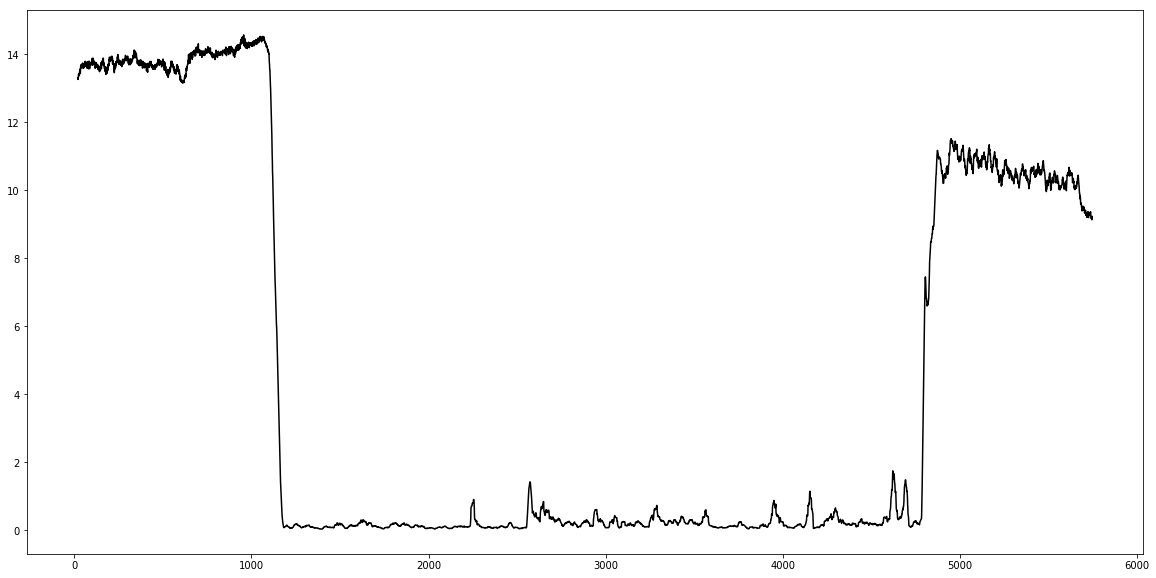

In [26]:
# plt.axvline(x=min(outs), c='r')
# plt.axvline(x=max(outs), c='r')
clean_sv.velocity.plot(figsize=(20,10), c=(0,0,0))
# gsplt.plot_segments(clean_sv, alpha=1.5)



In [27]:
gspp.get_outliers(clean_sv.velocity, alpha=1)

Int64Index([], dtype='int64')

In [67]:
00

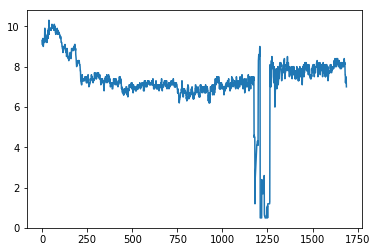

In [13]:
clean_sv.speed.plot()

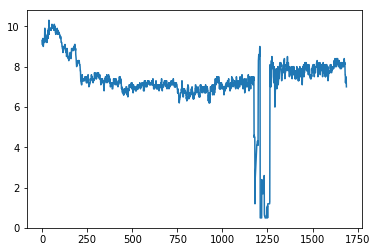

In [13]:
clean_sv.speed.plot()

In [8]:
smpl = gspp.pick_random_group(traj,'mmsi')

In [12]:
smpl.mmsi

5         226179000
16        226179000
27        226179000
32        226179000
37        226179000
45        226179000
51        226179000
58        226179000
65        226179000
82        226179000
88        226179000
95        226179000
106       226179000
114       226179000
122       226179000
128       226179000
135       226179000
151       226179000
158       226179000
171       226179000
181       226179000
206       226179000
220       226179000
239       226179000
246       226179000
252       226179000
259       226179000
291       226179000
312       226179000
317       226179000
            ...    
315450    226179000
315457    226179000
315461    226179000
315468    226179000
315480    226179000
315501    226179000
315508    226179000
315520    226179000
315529    226179000
315536    226179000
315543    226179000
315551    226179000
315565    226179000
315572    226179000
315579    226179000
315586    226179000
315594    226179000
315610    226179000
315619    226179000


In [8]:
static = traj.loc[traj.speed == 0]
almost_static = traj.loc[(traj.speed < 1) & (traj.speed > 0)]
static.reset_index()
almost_static.reset_index()

,index,id,mmsi,status,turn,speed,course,heading,lon,lat,ts,geom
0,17,12392350,226179000,0.0,-127.0,0.1,277.4,511,-4.325338,48.098125,1456889835,POINT (-4.3253384 48.098125)
1,25,12392358,226179000,0.0,-127.0,0.1,278.3,511,-4.325330,48.098125,1456889845,POINT (-4.32533 48.098125)
2,31,12392364,226179000,0.0,-127.0,0.1,277.0,511,-4.325323,48.098130,1456889853,POINT (-4.325323 48.09813)
3,45,12392378,226179000,0.0,-127.0,0.1,277.6,511,-4.325322,48.098137,1456889875,POINT (-4.3253217 48.098137)
4,62,12392395,226179000,0.0,-127.0,0.1,275.2,511,-4.325360,48.098114,1456889905,POINT (-4.32536 48.098114)
5,75,12392408,226179000,0.0,-127.0,0.1,271.9,511,-4.325358,48.098106,1456889924,POINT (-4.3253584 48.098106)
6,86,12392419,226179000,0.0,-127.0,0.1,277.4,511,-4.325342,48.098118,1456889945,POINT (-4.3253417 48.098118)
7,94,12392427,226179000,0.0,-127.0,0.1,277.6,511,-4.325348,48.098118,1456889955,POINT (-4.3253484 48.098118)
8,108,12392441,226179000,0.0,-127.0,0.1,275.5,511,-4.325333,48.098125,1456889973,POINT (-4.325333 48.098125)
9,115,12392448,226179000,0.0,-127.0,0.1,278.4,511,-4.325323,48.098130,1456889984,POINT (-4.325323 48.09813)


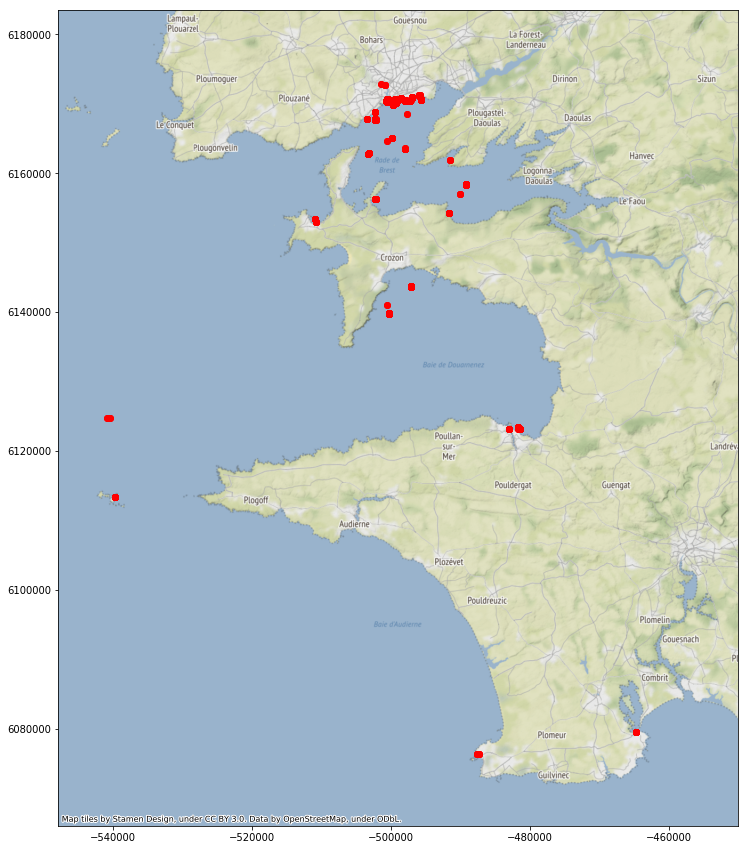

In [26]:
plots.map_plot(static)

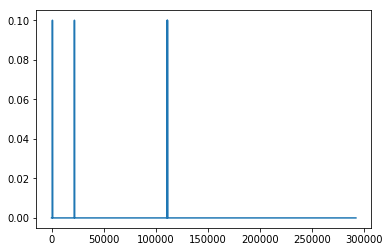

In [89]:
traj.loc[traj['mmsi'] == choice(traj.mmsi.unique())].speed.plot()

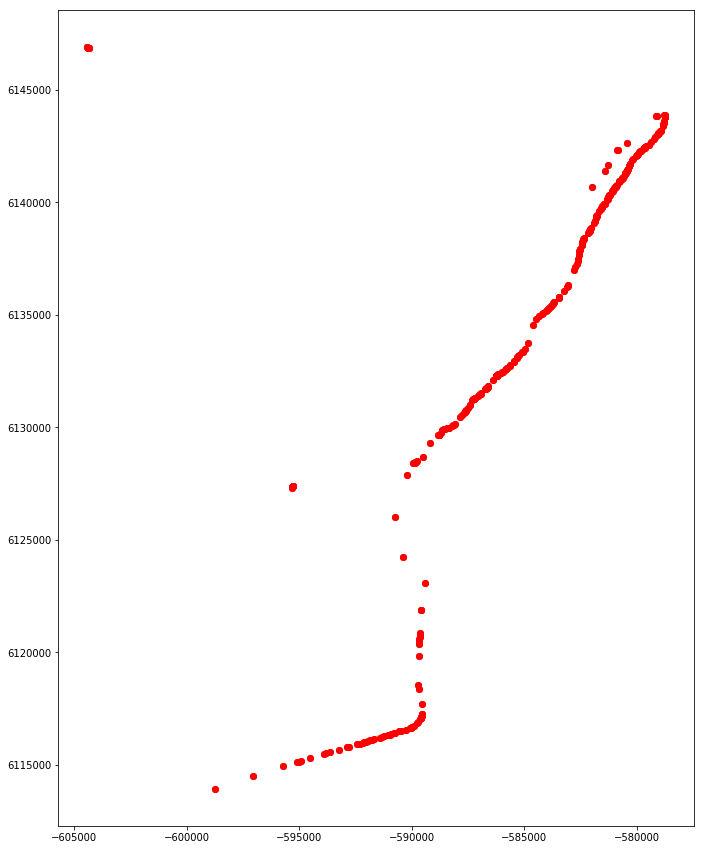

In [27]:
sample_ves.crs = {'init': 'epsg:4326'}
tmp = sample_ves.to_crs(epsg=3857).plot(figsize=(15, 15),c='r')

In [53]:
almost_static['distance_to_nearest_port'] = almost_static.geom.apply(distance_to_nearest_port, args=(ports,))

/home/theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
almost_static.distance_to_nearest_port.max()

0.16155259593051566